In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/car_age_price.csv') 

In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.shape

(112, 2)

In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

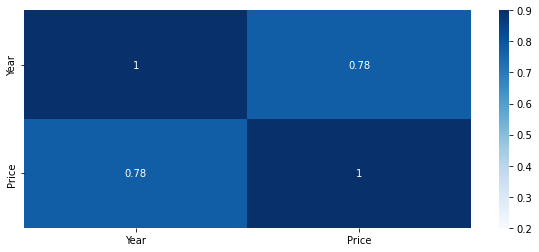

In [8]:
corrmatrix=data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=0.2,vmax=0.9,annot=True,cmap='Blues')

In [9]:
data.columns

Index(['Year', 'Price'], dtype='object')

***LINEAR REGRESSION***

In [12]:
y=data['Price']
X=data.drop(['Price'],axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [15]:
X_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [16]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [17]:
predictions

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
print('Mean squared error is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

Mean squared error is: 4326906256.829671
R squared value is: 0.36759313425902185


<function matplotlib.pyplot.show(*args, **kw)>

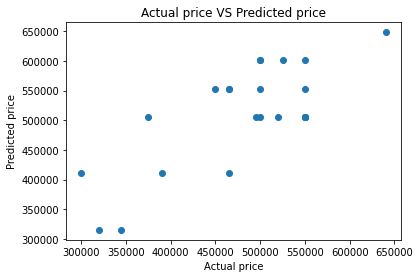

In [20]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price VS Predicted price')
plt.show

Predicted price

In [21]:
lr.predict([[2022]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([743601.61594504])

***LASSO REGRESSION***

In [18]:
y=data['Price']
X=data.drop(['Price'],axis=1)

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [23]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)

In [24]:
model=lasso.fit(X_train,y_train)
predictions=model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
print('Mean squared error is:',mean_squared_error(y_test,predictions))
print('R squared value is:',r2_score(y_test,predictions))

Mean squared error is: 4326859771.015669
R squared value is: 0.3675999284778446


<function matplotlib.pyplot.show(*args, **kw)>

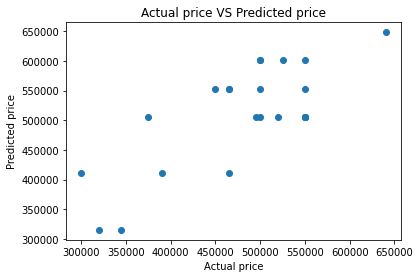

In [27]:
plt.scatter(y_test,predictions)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price VS Predicted price')
plt.show

***lasso regression value is slightly smaller than linear regression value,so lasso performs better***

***Mean squared error is: 4326906256.829671 for linear regression***

***Mean squared error is: 4326859771.015669 for lasso regression***

# *Predicted price*

In [28]:
lasso.predict([[2022]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


array([743599.37427144])